In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

from taskpriors.core import compute_expectation_variance

In [35]:
#load json file 
import json
with open('linear_probe_results_avg.json', 'r') as f:
    results = json.load(f)
#print results
print(results)


[{'model': 'convnextv2_base', 'mean_accuracy': 64.10896301269531, 'accuracies': [64.60674285888672, 65.65534210205078, 62.29305648803711, 63.04563522338867, 64.92082977294922, 65.50472259521484, 61.83913803100586, 67.43798065185547, 64.8902816772461, 62.759132385253906, 62.093597412109375, 62.667327880859375, 62.91195297241211, 60.29116439819336, 64.45872497558594, 65.79457092285156, 65.21421813964844, 62.106300354003906, 64.7044448852539, 65.16610717773438, 61.57635498046875, 65.78185272216797, 64.55938720703125, 65.29512786865234, 64.16423797607422, 62.16349792480469, 65.03276062011719, 65.46116638183594, 63.42298126220703, 61.998504638671875, 65.43888854980469, 64.7159194946289, 62.3311653137207, 64.57978057861328, 64.11149597167969, 63.169532775878906, 64.89128112792969, 61.70994567871094, 68.06320190429688, 60.34526062011719, 64.40389251708984, 65.93220520019531, 65.40880584716797, 65.72115325927734, 63.62055969238281, 64.45359802246094, 63.01642608642578, 68.67156219482422, 66.67

In [36]:
# make into dataframe
# Convert results to a DataFrame
df = pd.DataFrame()

# Extract data from each result
for result in results:
    # Create a temporary DataFrame for this result
    temp_df = pd.DataFrame({
        'model': result['model'],
        'mean_accuracy': result['mean_accuracy'],
        #'mean_mse': result['mean_mse'],
        'accuracies': [result['accuracies']]
    }, index=[0])
    
    # Append to the main DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

# Display the DataFrame
df.head()

,model,mean_accuracy,accuracies
0,convnextv2_base,64.108963,"[64.60674285888672, 65.65534210205078, 62.2930..."
1,wide_resnet101_2,67.279434,"[67.2447509765625, 68.27669525146484, 65.18408..."
2,deit_small_patch16_224,58.537819,"[58.060577392578125, 59.8543701171875, 55.8191..."
3,regnety_032,68.014000,"[67.9531021118164, 67.28155517578125, 67.08673..."
4,deit_tiny_patch16_224,56.073780,"[55.05617904663086, 58.66504669189453, 53.8176..."


In [37]:
# Sort the dataframe by mean_accuracy in ascending order (lowest first)
df = df.sort_values(by='mean_accuracy', ascending=True)

to_drop = ['inception_next_small', 'inception_next_atto']
df = df[~df['model'].isin(to_drop)]
df

,model,mean_accuracy,accuracies
4,deit_tiny_patch16_224,56.073780,"[55.05617904663086, 58.66504669189453, 53.8176..."
2,deit_small_patch16_224,58.537819,"[58.060577392578125, 59.8543701171875, 55.8191..."
11,pvt_v2_b2,59.742096,"[57.88959503173828, 61.4563102722168, 58.04299..."
25,resnet34,60.017204,"[59.7703971862793, 61.6019401550293, 58.413639..."
32,resnet18,60.159393,"[60.01465606689453, 61.16504669189453, 56.2144..."
20,beit_base_patch16_224,61.455383,"[59.89252471923828, 63.10679626464844, 57.3758..."
27,convnext_small,61.930969,"[61.260379791259766, 62.912620544433594, 60.68..."
18,deit_base_patch16_224,62.130856,"[62.43282699584961, 63.34951400756836, 61.0328..."
26,swin_tiny_patch4_window7_224,62.137283,"[61.577919006347656, 63.786407470703125, 60.56..."
28,vit_base_patch16_224,62.269966,"[62.506107330322266, 62.42718505859375, 61.255..."


In [38]:
# Calculate variance of accuracies and add to dataframe
df['acc_var'] = df['accuracies'].apply(np.var)

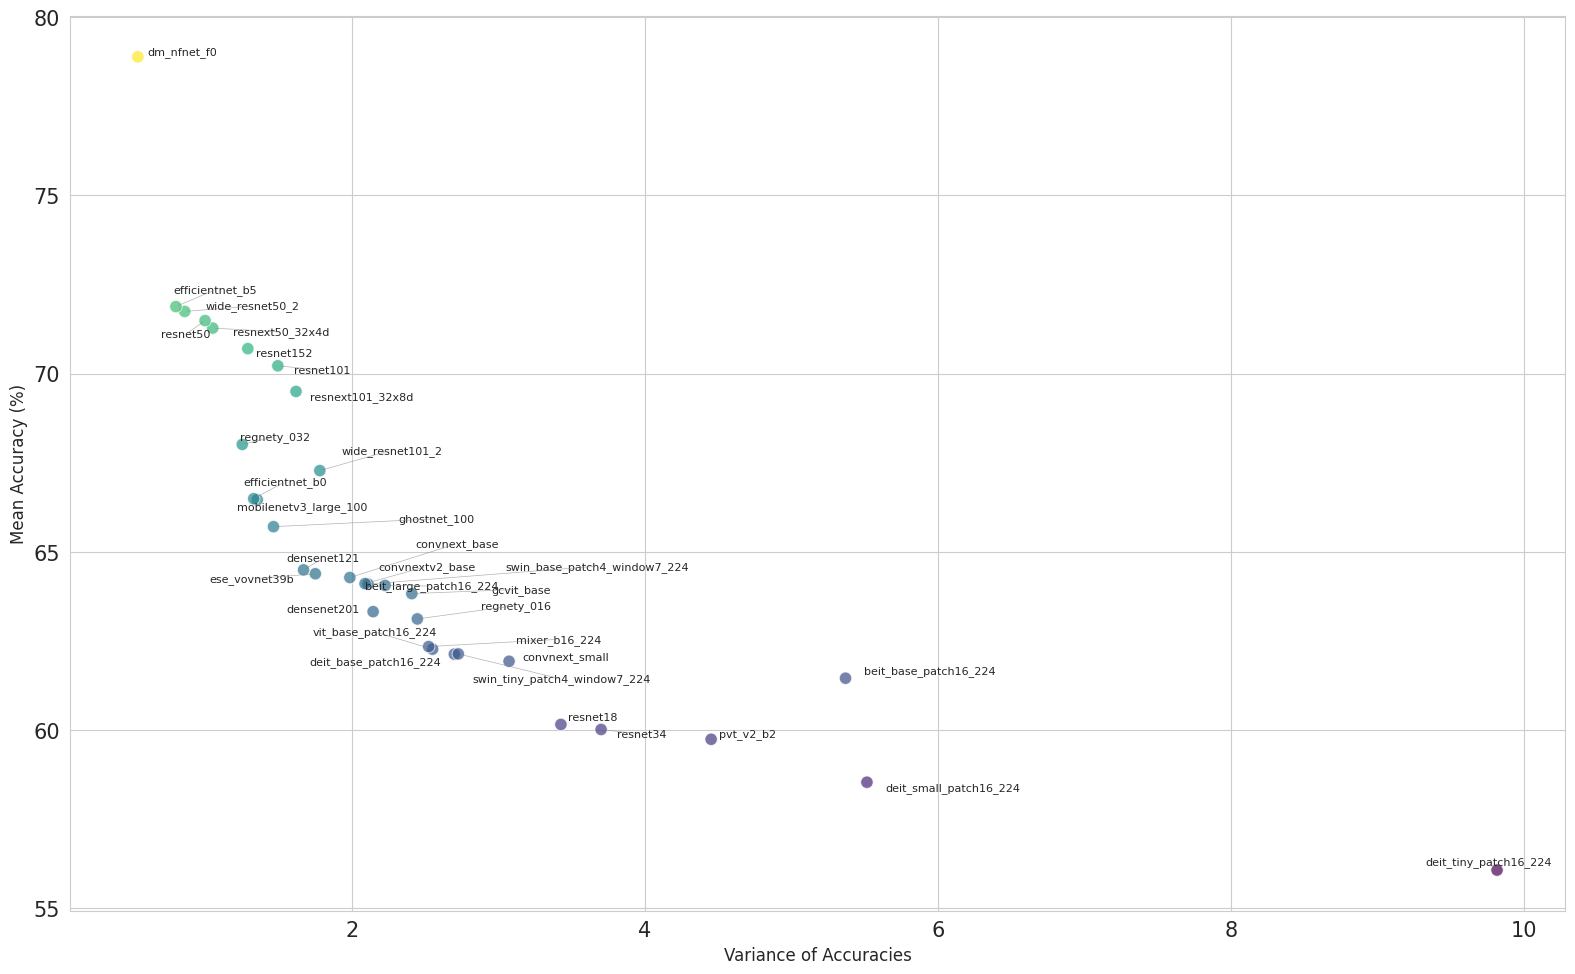

In [39]:
# Set the style
sns.set_style("whitegrid")

# Create figure with larger size for better label spacing
plt.figure(figsize=(16, 10))

# Create scatter plot with seaborn
scatter = sns.scatterplot(
    data=df,
    x='acc_var',
    y='mean_accuracy',
    alpha=0.7,
    s=80,  # Point size
    hue='mean_accuracy',  # Color by accuracy
    palette='viridis'
)

# Add labels for all models
texts = []
for i, row in df.iterrows():
    texts.append(plt.text(row['acc_var'], row['mean_accuracy'], row['model'], fontsize=8))

# Adjust text positions to minimize overlap with more iterations and force
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6, lw=0.5),
            expand_points=(1.5, 1.5),
            force_points=(0.5, 0.5),
            force_text=(0.5, 0.8),
            force_objects=(0.5, 0.5),
            lim=500)  # More iterations for better placement

# Add title and labels with better formatting
#plt.title('Model Performance: Mean Accuracy vs. Variance', fontsize=14, fontweight='bold')
plt.xlabel('Variance of Accuracies', fontsize=12)
plt.ylabel('Mean Accuracy (%)', fontsize=12)

# Remove the legend for the hue parameter (it's redundant with y-axis)
plt.legend([],[], frameon=False)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_87112/1677564928.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


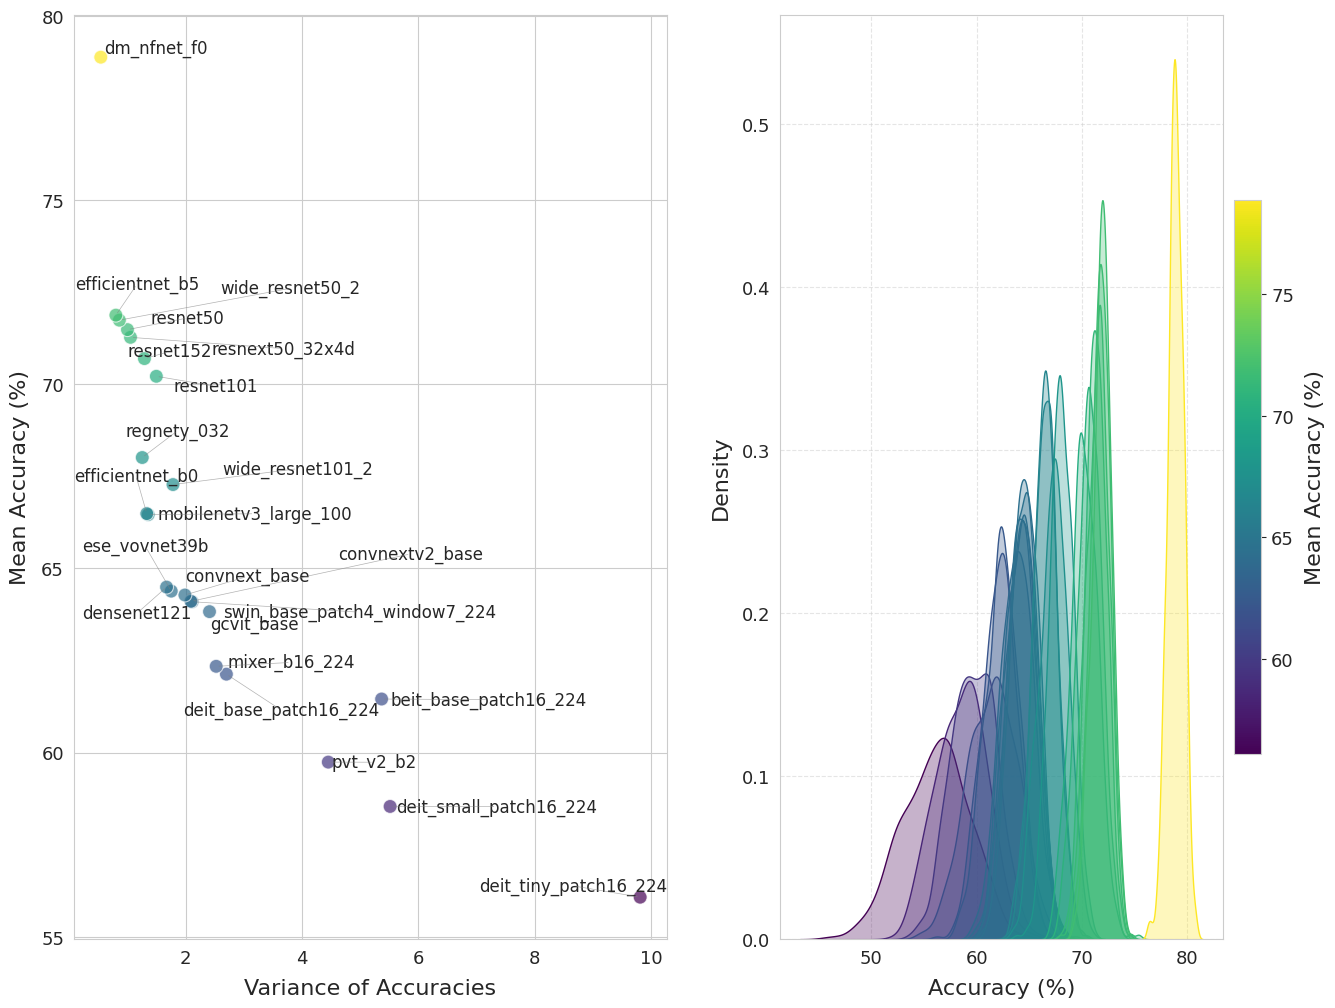

In [ ]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [1, .9], 'wspace': 0.2})

# Set global font size for all text elements (a bit smaller than before)
plt.rcParams.update({'font.size': 15})

# Get colormap
cmap = cm.viridis

# Get min and max accuracy for normalization
min_acc = df['mean_accuracy'].min()
max_acc = df['mean_accuracy'].max()
norm = plt.Normalize(min_acc, max_acc)

# PLOT 1 (Left): Scatter plot
sns.set_style("whitegrid")

# Create scatter plot with seaborn on the first axis
scatter = sns.scatterplot(
    data=df,
    x='acc_var',
    y='mean_accuracy',
    alpha=0.7,
    s=100,  # Slightly smaller point size
    hue='mean_accuracy',  # Color by accuracy
    palette='viridis',
    ax=ax1,
    legend=False  # Remove legend, handled below
)

# Add labels for all models
texts = []
for i, row in df.iterrows():
    texts.append(ax1.text(row['acc_var'], row['mean_accuracy'], row['model'], fontsize=12))

# Adjust text positions to minimize overlap
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6, lw=0.5),
    expand_points=(1.5, 1.5),
    force_points=(0.5, 0.5),
    force_text=(0.5, 0.8),
    force_objects=(0.5, 0.5),
    lim=500,
    ax=ax1
)

# Add title and labels with slightly smaller font (not bold)
#ax1.set_title('Model Performance: Mean Accuracy vs. Variance', fontsize=18)
ax1.set_xlabel('Variance of Accuracies', fontsize=16, labelpad=8)
ax1.set_ylabel('Mean Accuracy (%)', fontsize=16, labelpad=8)
ax1.tick_params(axis='both', which='major', labelsize=13)

# Remove the legend for the hue parameter (it's redundant with y-axis)
ax1.legend([], [], frameon=False)

# PLOT 2 (Right): KDE plot
# Plot KDE for each model's accuracies on the second axis
for i, row in df.iterrows():
    model_name = row['model']
    accuracies = row['accuracies']
    mean_acc = row['mean_accuracy']
    
    # Use the same normalization as in the scatter plot
    color = cmap(norm(mean_acc))
    
    # Create KDE plot with color based on mean accuracy
    sns.kdeplot(accuracies, label=model_name, fill=True, alpha=0.3, color=color, ax=ax2)

# Add title and labels with slightly smaller font (not bold)
#ax2.set_title('Distribution of Accuracies Across Models', fontsize=18)
ax2.set_xlabel('Accuracy (%)', fontsize=16, labelpad=8)
ax2.set_ylabel('Density', fontsize=16, labelpad=8)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.grid(True, linestyle='--', alpha=0.5)

# Add legend (optional, uncomment if needed)
#ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add colorbar to show mean accuracy scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# Position the colorbar on the right side of the figure
cbar = fig.colorbar(sm, ax=ax2, label='Mean Accuracy (%)', pad=0.02, shrink=0.6)
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Mean Accuracy (%)', fontsize=16, labelpad=8)

# Improve layout
plt.tight_layout()

# Save the plot as PDF
plt.savefig('model_performance_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()